# Atención a clientes 

# Diccionario de datos

* `id_llamada` - Contiene el identificador de la llamada.
* `fecha` - Fecha en la que se realizó la llamada.
* `asesor` - Nombre del asesor que atendió la llamada.
* `area` - Área en donde fue recibida la llamada.
* `atendida` - Indica si la llamada fue atendida o no.
* `resuelto` - Indica si se resolvió el problema por el cual el cliente llamó (0 = no, 1 = sí).
* `tiempo_respuesta` - Tiempo que tardó el asesor en contestar (en segundos).
* `duracion_llamada` - Duración total de la llamada (en minutos con segundos).
* `duracion_llamada_asistida` - Tiempo de la llamada con asistencia del asesor (en segundos).
* `indice_satisfaccion` - Índice de satisfacción de 1 a 5 (donde 1 es pésimo y 5 es excelente).

In [18]:
# Librerias utilizadas
import datetime as dt 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [19]:
# Cargar el dataset 
servicio = pd.read_excel("./datasets/datos_de_servicio.xlsx")

In [20]:
# Funcion para obtener información general del dataset
def leer_datos(df):
    print(df.head())
    print(df.info())
    print(df.describe())

In [21]:
leer_datos(servicio)

  Id Llamada      Fecha   Asistente           Área Respondido Resuelto (S/N)  \
0     ID0001 2023-03-22     Juan D.         Ventas         SÍ              S   
1     ID0002 2023-03-17  Marcelo F.       RECLAMOS         SÍ              N   
2     ID0003 2023-03-18  Leandro C.         Ventas         SÍ              S   
3     ID0004 2023-03-09  Leandro C.         Ventas         SÍ              S   
4     ID0007 2023-03-01   Marina Z.  Cancelaciones         SÍ              S   

   Velocidad de respuesta Duración de la llamada  \
0                     109               00:02:23   
1                      70               00:04:02   
2                      10               00:02:11   
3                      53               00:00:37   
4                      24               00:03:40   

   Duración con asistente en segundos  Índice de satisfacción  
0                                 143                       2  
1                                 242                       3  
2             

## 1. Pre-procesamiento de datos

1. Normalizar el nombre de las columnas 
2. Convertir a minusculas los datos de las columnas `asesor` y `area`
2. Quitar asentos de la columna `atendida`
3. Convetir los datos de la columna `resuelto` 0 para no y 1 para si 
4. Convetir a segundos el tiempo de la columna `duracion_llamada` 


In [22]:
print(servicio.columns)

Index(['Id Llamada', 'Fecha', 'Asistente', 'Área', 'Respondido',
       'Resuelto (S/N)', 'Velocidad de respuesta', 'Duración de la llamada',
       'Duración con asistente en segundos', 'Índice de satisfacción'],
      dtype='object')


In [23]:
# normalizar el nombre de las columnas
columns_new = {'Id Llamada': 'id_llamada', 
               'Fecha' : 'fecha', 
               'Asistente' : 'asesor',
               'Área' : 'area',
               'Respondido' : 'respondio',
               'Resuelto (S/N)' : 'resuelto',
               'Velocidad de respuesta': 'tiempo_respuesta',
               'Duración de la llamada': 'duracion_llamada',
               'Duración con asistente en segundos': 'duracion_llamada_asistida' ,
               'Índice de satisfacción' : 'indice_satisfaccion'
}

In [24]:
# cambiar nombre columnas antiguas a nuevas
servicio = servicio.rename(columns=columns_new)

In [25]:
# convertir a minusculas los datos de asesor y area 
def to_lower(df,columns):
    df[columns] = df[columns].apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
    return df

In [26]:
# llamar a la funcion
to_lower(servicio, ['asesor', 'area'])

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada,duracion_llamada_asistida,indice_satisfaccion
0,ID0001,2023-03-22,juan d.,ventas,SÍ,S,109,00:02:23,143,2
1,ID0002,2023-03-17,marcelo f.,reclamos,SÍ,N,70,00:04:02,242,3
2,ID0003,2023-03-18,leandro c.,ventas,SÍ,S,10,00:02:11,131,3
3,ID0004,2023-03-09,leandro c.,ventas,SÍ,S,53,00:00:37,37,2
4,ID0007,2023-03-01,marina z.,cancelaciones,SÍ,S,24,00:03:40,220,2
...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,SÍ,S,92,00:06:00,360,4
1005,ID1765,2023-03-05,ana s.,ventas,SÍ,S,95,00:05:00,300,3
1006,ID1766,2023-03-20,gustavo m.,ventas,SÍ,S,49,00:01:58,118,5
1007,ID1770,2023-03-04,ana s.,cancelaciones,SÍ,S,78,00:01:02,62,4


In [27]:
# convetir los datos de la columna respondio
servicio['respondio'] = servicio['respondio'].replace("SÍ", "si")

In [28]:
# convetir los datos de la columna resuelto
servicio['resuelto'] = servicio['resuelto'].replace(['S', 'N'], ['1','0'])

In [29]:
# convertir los datos de la columna resuelto a int 
servicio['resuelto'] = servicio['resuelto'].astype('int')

In [30]:
# convertir los datos de duracion llamada a segundos
servicio['duracion_llamada'] = pd.to_timedelta(servicio['duracion_llamada']).dt.total_seconds() 

In [31]:
# redondear a dos decimales el numero obtenido
servicio['duracion_llamada'] = servicio['duracion_llamada'].round(2)

## Enriquecer los datos

In [32]:
# agregar una columna con el indice categorico 
servicio['indice_categorico'] = servicio['indice_satisfaccion'].astype('object')

In [33]:
# agregar una columna con los dias 
servicio['dias'] = servicio['fecha'].dt.day
servicio

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada,duracion_llamada_asistida,indice_satisfaccion,indice_categorico,dias
0,ID0001,2023-03-22,juan d.,ventas,si,1,109,143.0,143,2,2,22
1,ID0002,2023-03-17,marcelo f.,reclamos,si,0,70,242.0,242,3,3,17
2,ID0003,2023-03-18,leandro c.,ventas,si,1,10,131.0,131,3,3,18
3,ID0004,2023-03-09,leandro c.,ventas,si,1,53,37.0,37,2,2,9
4,ID0007,2023-03-01,marina z.,cancelaciones,si,1,24,220.0,220,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,si,1,92,360.0,360,4,4,6
1005,ID1765,2023-03-05,ana s.,ventas,si,1,95,300.0,300,3,3,5
1006,ID1766,2023-03-20,gustavo m.,ventas,si,1,49,118.0,118,5,5,20
1007,ID1770,2023-03-04,ana s.,cancelaciones,si,1,78,62.0,62,4,4,4


## 2. Análisis exploratorio (EDA)

* Identificar valores duplicados
* Identificar valores ausentes 
* Identificar valores atípicos

In [34]:
def valores(df):
    print("El número de valores duplicados es:", df.duplicated().sum())
    print("El número de valores ausentes es:\n", df.isna().sum())

In [35]:
valores(servicio)

El número de valores duplicados es: 0
El número de valores ausentes es:
 id_llamada                   0
fecha                        0
asesor                       0
area                         0
respondio                    0
resuelto                     0
tiempo_respuesta             0
duracion_llamada             0
duracion_llamada_asistida    0
indice_satisfaccion          0
indice_categorico            0
dias                         0
dtype: int64


In [36]:
# valores atipicos 
servicio.describe()

,fecha,resuelto,tiempo_respuesta,duracion_llamada,duracion_llamada_asistida,indice_satisfaccion,dias
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,2023-03-15 15:19:05.292368640,0.926660,66.682854,223.778989,223.778989,3.402379,15.638256
min,2023-03-01 00:00:00,0.000000,10.000000,30.000000,30.000000,1.000000,1.000000
25%,2023-03-08 00:00:00,1.000000,40.000000,127.000000,127.000000,3.000000,8.000000
50%,2023-03-15 00:00:00,1.000000,67.000000,228.000000,228.000000,3.000000,15.000000
75%,2023-03-23 00:00:00,1.000000,95.000000,324.000000,324.000000,4.000000,23.000000
max,2023-03-31 00:00:00,1.000000,125.000000,419.000000,419.000000,5.000000,31.000000
std,NaN,0.260823,33.342953,113.007689,113.007689,1.201287,8.868247


### Explorar valores de las 3 columnas de tiempo


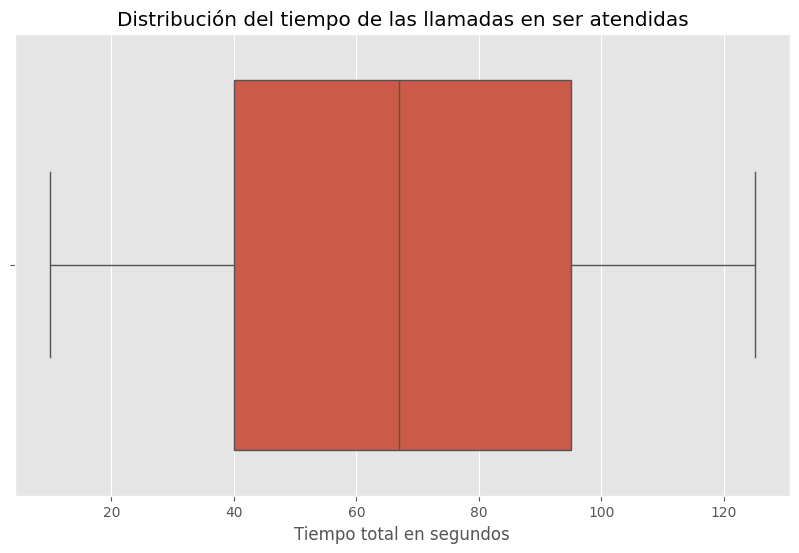

In [37]:
# estilo del grafico
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, x='tiempo_respuesta')
    # formato 
    plt.title('Distribución del tiempo de las llamadas en ser atendidas')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

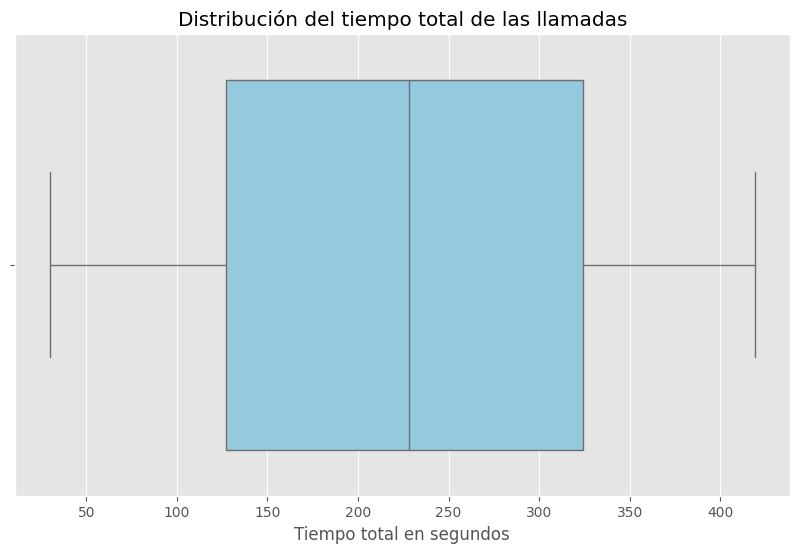

In [38]:
# distribucion duracion de las llamadas en minutos
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, 
                x='duracion_llamada', 
                color='skyblue')
    # formato 
    plt.title('Distribución del tiempo total de las llamadas')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

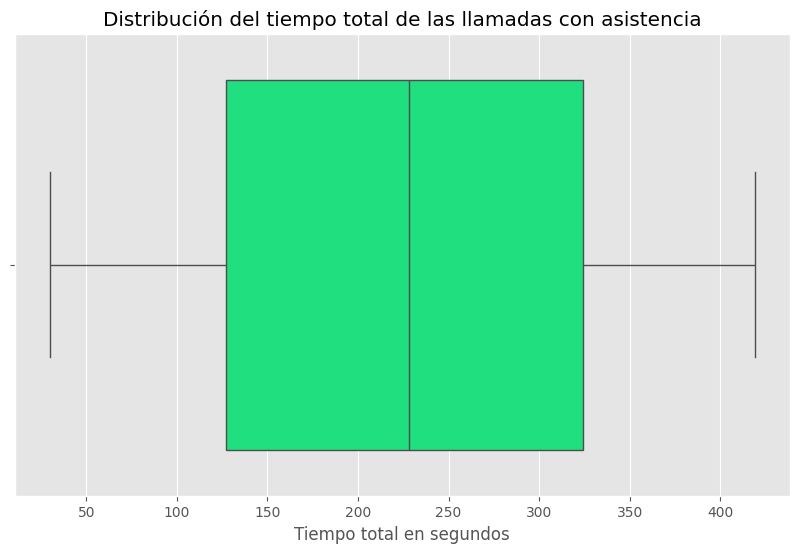

In [39]:
# distribucion duracion de las llamadas en segundos
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, 
                x='duracion_llamada_asistida', 
                color='springgreen')
    # formato 
    plt.title('Distribución del tiempo total de las llamadas con asistencia')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

## Análisis solicitado: 
1. Eficiencia en la atención:
* ¿Cuál es el tiempo promedio de respuesta de los asesores?
* ¿Existe alguna variación en el tiempo de respuesta según el área?

2. Duración de las llamadas:
* ¿Cuál es la distribución de la duración total de las llamadas?
* ¿Qué porcentaje del tiempo total de espera representa el tiempo asistido por un asesor?

3. Satisfacción del cliente:
* ¿Cuál es el promedio y la distribución del índice de satisfacción?
* ¿Hay una relación entre la duración de la llamada y la satisfacción del cliente?
* ¿Las llamadas resueltas tienden a tener índices de satisfacción más altos?

4. Tasa de resolución y respuesta:
* ¿Qué porcentaje de llamadas fueron respondidas y cuál fue la tasa de resolución?
* ¿Hay áreas con una mayor cantidad de llamadas sin respuesta?

### Eficiencia en la atención

In [40]:
# calcular el tiempo promedio de respuesta de los asesores
promedio_respuesta = servicio['tiempo_respuesta'].mean()
# redondear valor
promedio_respuesta = promedio_respuesta.round(2)
# imprimir el tiempo
print(f"El tiempo promedio de respuesta de los operadores es de: {promedio_respuesta} segundos") 

El tiempo promedio de respuesta de los operadores es de: 66.68 segundos


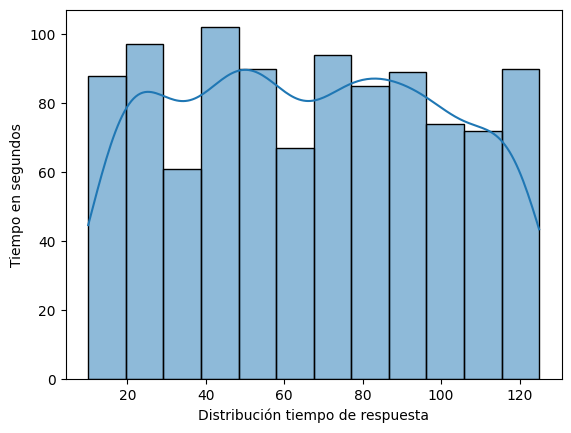

In [41]:
# histograma de distribucion de tiempo
sns.histplot(data=servicio,
             x='tiempo_respuesta', 
              binwidth=10, 
             bins=20,
             kde=True)
plt.xlabel('Distribución tiempo de respuesta')
plt.ylabel('Tiempo en segundos')
plt.show()

In [42]:
# variacion en el tiempo de respuesta segun el area 
area_tiempo = servicio.groupby('area')['tiempo_respuesta'].sum().reset_index(name='tiempo_por_area')
# ordenar los datos de mayor a menor 
area_tiempo = area_tiempo.sort_values(by='tiempo_por_area')
# mostrar tabla
area_tiempo

,area,tiempo_por_area
2,reclamos,12781
1,intercambios,13265
0,cancelaciones,13480
3,ventas,27757


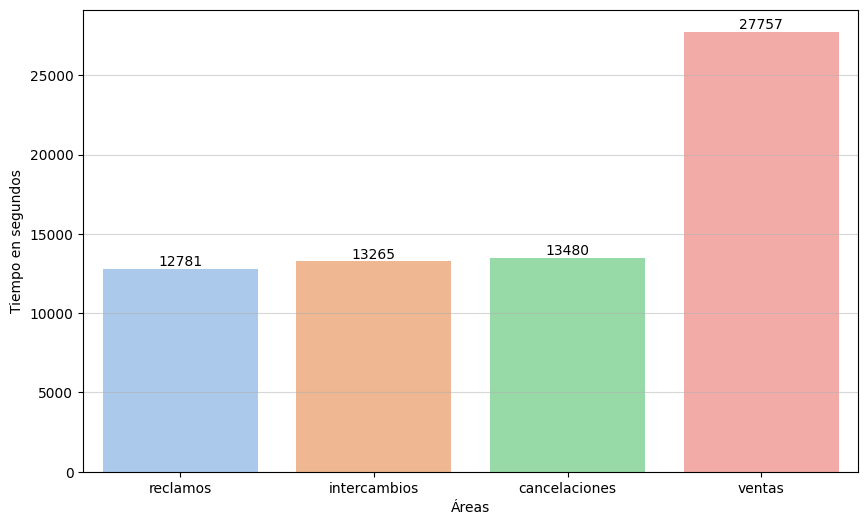

In [43]:
# grafica del tiempo de respuesta por area
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))

    ax = sns.barplot(area_tiempo,
                    x='area', 
                    y='tiempo_por_area',
                    hue='area', 
                    estimator='sum')
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

plt.xlabel('Áreas')
plt.ylabel('Tiempo en segundos')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Duración de las llamadas

In [44]:
# calcular el tiempo de duracion de las llamadas
llamada_total = servicio['duracion_llamada'].mean()
# redondear valor
llamada_total = llamada_total.round(2)
# imprimir el tiempo
print(f"El tiempo promedio de respuesta de los operadores es de: {llamada_total} segundos") 

El tiempo promedio de respuesta de los operadores es de: 223.78 segundos


In [45]:
# porcentaje del tiempo total de espera representa el tiempo asistido por un asesor
servicio['%_tiempo'] = (servicio['duracion_llamada_asistida'] * 100) / (servicio['duracion_llamada'] + servicio['tiempo_respuesta'])
# redondear los resultados 
servicio['%_tiempo'] = servicio['%_tiempo'].round(2)
# mostrar resultados
servicio

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada,duracion_llamada_asistida,indice_satisfaccion,indice_categorico,dias,%_tiempo
0,ID0001,2023-03-22,juan d.,ventas,si,1,109,143.0,143,2,2,22,56.75
1,ID0002,2023-03-17,marcelo f.,reclamos,si,0,70,242.0,242,3,3,17,77.56
2,ID0003,2023-03-18,leandro c.,ventas,si,1,10,131.0,131,3,3,18,92.91
3,ID0004,2023-03-09,leandro c.,ventas,si,1,53,37.0,37,2,2,9,41.11
4,ID0007,2023-03-01,marina z.,cancelaciones,si,1,24,220.0,220,2,2,1,90.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,si,1,92,360.0,360,4,4,6,79.65
1005,ID1765,2023-03-05,ana s.,ventas,si,1,95,300.0,300,3,3,5,75.95
1006,ID1766,2023-03-20,gustavo m.,ventas,si,1,49,118.0,118,5,5,20,70.66
1007,ID1770,2023-03-04,ana s.,cancelaciones,si,1,78,62.0,62,4,4,4,44.29


In [46]:
# promedio de porcentaje de tiempo total 
promedio_tiempo = servicio['%_tiempo'].mean()
# redondear el valor 
promedio_tiempo = promedio_tiempo.round(2)
# mostrar porcentaje
print(f'El porcentaje promedio de espera es: {promedio_tiempo}%')

El porcentaje promedio de espera es: 73.73%


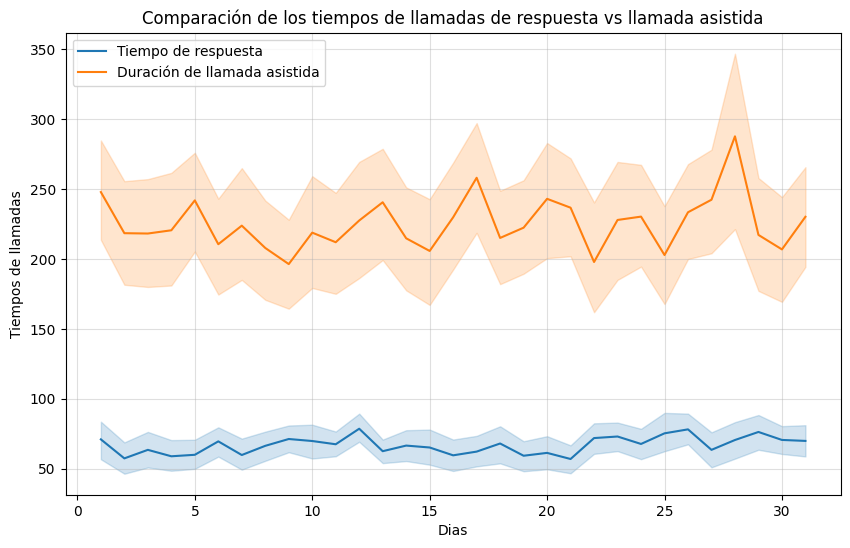

In [47]:
# grafica comparativa tiempos de llamadas
plt.figure(figsize=(10,6))
# grafico
sns.lineplot(data=servicio, 
             x='dias', 
             y='tiempo_respuesta',
             label='Tiempo de respuesta')
sns.lineplot(data=servicio, 
             x='dias', 
             y='duracion_llamada_asistida', 
             label='Duración de llamada asistida')
# formato grafico 
plt.title('Comparación de los tiempos de llamadas de respuesta vs llamada asistida')
plt.xlabel('Dias')
plt.ylabel('Tiempos de llamadas')
plt.grid(axis='both', alpha=0.4)
plt.legend()
# mostrar grafico
plt.show()

### Satisfacción del cliente

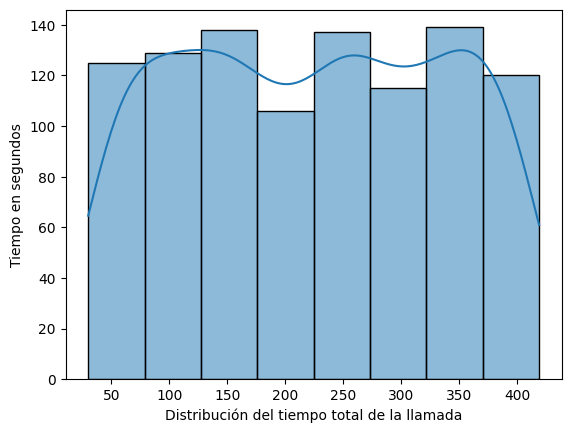

In [48]:
# distribucion de la duracion total de llamadas 
sns.histplot(data=servicio,
             x='duracion_llamada', 
             bins=8,
             kde=True)
plt.xlabel('Distribución del tiempo total de la llamada')
plt.ylabel('Tiempo en segundos')
plt.show()

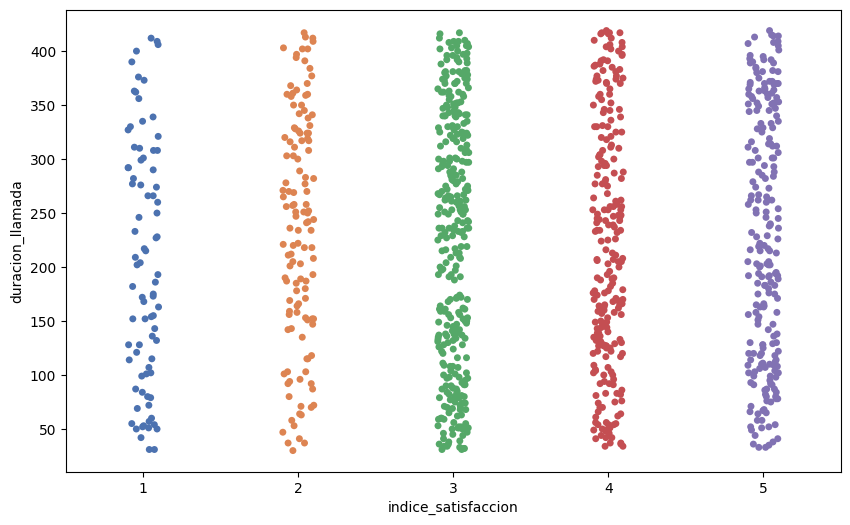

In [66]:
# grafico de la relacion entre llamadas y la satisfaccion 
plt.figure(figsize=(10,6))
# desarrollo grafico
sns.stripplot(data=servicio, 
              x='indice_satisfaccion', 
              y='duracion_llamada', 
              hue='indice_satisfaccion', 
              jitter=True,
              palette='deep',
              legend=False)
plt.show()

### Tasa de resolución y respuesta